In [1]:
import torch
import torchvision
import torch.nn as nn

import numpy as np 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt 
import math

USE_CUDA = torch.cuda.is_available()

NUM_in = 1
NUM_out = 1
NUM_HIDDEN = 5

In [2]:
#定义模型
model = torch.nn.Sequential(
    torch.nn.Linear(NUM_in,NUM_HIDDEN),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(NUM_HIDDEN,NUM_out)
)
if USE_CUDA:
    model = model.cuda()

In [3]:
#定义损失函数和优化策略
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [4]:
#读取训练数据
train_addr = "NR-Train-20.csv"
test_addr = "NR-Test-20.csv"
data = pd.read_csv(train_addr,header=None).values
x_train = torch.tensor(data[:,0])
y_train = torch.tensor(data[:,1])
data = pd.read_csv(test_addr,header=None).values
x_test = torch.tensor(data[:,0])
y_test = torch.tensor(data[:,1])

#转成列向量，-1表示自动计算，转化为len*1的相量
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

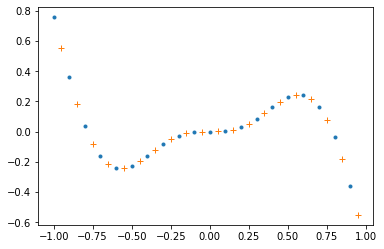

In [5]:
plt.plot(x_train,y_train,'.')
plt.plot(x_test,y_test,'+')

In [6]:
#转化为GPU Tensor
if USE_CUDA:
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()

In [7]:
#训练模型
for epoch in range(50000):
    y_pred = model(x_train.float())
    loss = loss_fn(y_train,y_pred)

    if epoch % 50 == 0:
        print("Epoch", epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


45e-06
Epoch 21000 3.699021827015308e-06
Epoch 21050 3.690361840576396e-06
Epoch 21100 3.687970184854005e-06
Epoch 21150 4.226879473700742e-06
Epoch 21200 3.670733071020128e-06
Epoch 21250 3.6601712745678715e-06
Epoch 21300 3.6524607553664813e-06
Epoch 21350 3.909676450558831e-06
Epoch 21400 6.808211414623541e-06
Epoch 21450 3.631839949321942e-06
Epoch 21500 3.623611280493402e-06
Epoch 21550 3.61678769197514e-06
Epoch 21600 3.610998830937061e-06
Epoch 21650 3.6034531659723097e-06
Epoch 21700 3.5970094124218494e-06
Epoch 21750 3.5892534652937317e-06
Epoch 21800 3.947112238720906e-05
Epoch 21850 4.126715799578928e-06
Epoch 21900 3.5726339356553886e-06
Epoch 21950 3.562296127676488e-06
Epoch 22000 7.487609401789209e-06
Epoch 22050 5.605530734681016e-06
Epoch 22100 3.551494048318668e-06
Epoch 22150 3.537117075342519e-06
Epoch 22200 3.5508990524872478e-06
Epoch 22250 4.189937453058065e-06
Epoch 22300 3.545787884158014e-06
Epoch 22350 3.5128543499811845e-06
Epoch 22400 3.5063841553547076e-06

In [8]:
#用训练好的模型进行计算
with torch.no_grad():
    y_pred = model(x_test.float())


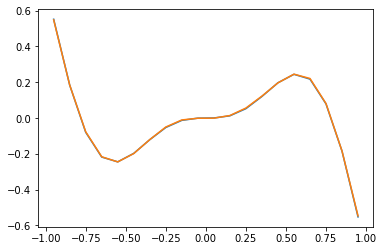

In [9]:
plt.plot(x_test.cpu(),y_test.cpu())
plt.plot(x_test.cpu(),y_pred.cpu())

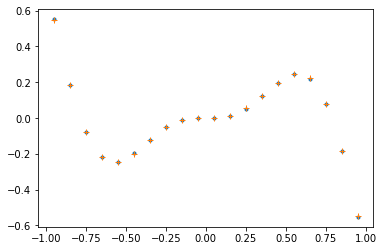

In [10]:
plt.plot(x_test.cpu(),y_test.cpu(),'.')
plt.plot(x_test.cpu(),y_pred.cpu(),'+')

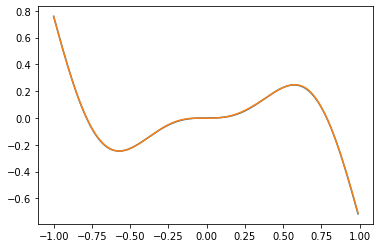

In [11]:
x = np.arange(-1,1,0.01)
y = list(map(lambda x : x*x*math.sin(4*x), x))

x = torch.tensor(x).reshape(-1,1).cuda()
y = torch.tensor(y).reshape(-1,1).cuda()

with torch.no_grad():
    y_p = model(x.float())

plt.plot(x.cpu(),y.cpu())
plt.plot(x.cpu(),y_p.cpu())

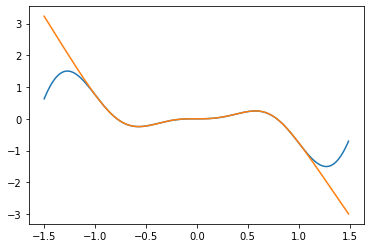

In [15]:
x1 = np.arange(-1.5,1.5,0.01)
y1 = list(map(lambda x : x*x*math.sin(4*x), x1))

x1 = torch.tensor(x1).reshape(-1,1).cuda()
y1 = torch.tensor(y1).reshape(-1,1).cuda()

with torch.no_grad():
    y1_p = model(x1.float())

plt.plot(x1.cpu(),y1.cpu())
plt.plot(x1.cpu(),y1_p.cpu())